In [81]:
%%timeit -n 1 -r 1
# Decision Tree Regression

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error, mean_squared_error, explained_variance_score, mean_absolute_percentage_error
import matplotlib.pyplot as plt

wind_dir_dict = {
    'N': 0,
    'NNE': 22.5,
    'NE': 45,
    'ENE': 67.5,
    'E': 90,
    'ESE': 112.5,
    'SE': 135,
    'SSE': 157.5,
    'S': 180,
    'SSW': 202.5,
    'SW': 225,
    'WSW': 247.5,
    'W': 270,
    'WNW': 292.5,
    'NW': 315,
    'NNW': 337.5
}

# Load the data
data = pd.read_csv('Guanyuan.csv')

# perform log transformation on 'PM2.5' column
data['PM2.5'] = data['PM2.5'].apply(np.log)
#data['PM10'] = data['PM10'].apply(np.log)

# print(data.head())

# add a new column with the degree values
data['wind_degrees'] = data['wd'].map(wind_dir_dict)

# Data cleaning
data = data.dropna()

# predictor variable selction
#X = data[['TEMP', 'DEWP', 'WSPM', 'RAIN', 'PRES', 'SO2', 'NO2', 'CO', 'O3', 'wind_degrees']]
X = data[['DEWP', 'SO2', 'NO2', 'CO']]

# Convert wind direction to one-hot encoding
#wind_direction = pd.get_dummies(data['wd'], prefix='wind_direction')
#X = pd.concat([X, wind_direction], axis=1)

y = data['PM2.5']
#y = data['PM10']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Model selction
model = DecisionTreeRegressor()

# Train the model
model.fit(X_train, y_train)

# Evaluate the model
y_pred = model.predict(X_test)
score = r2_score(y_test, y_pred)

# Evaluation metrics
y_pred = model.predict(X_test)

score_r2 = r2_score(y_test, y_pred)
score_mae = mean_absolute_error(y_test, y_pred)
score_mse = mean_squared_error(y_test, y_pred)
score_rmse = mean_squared_error(y_test, y_pred, squared=False)
score_ev = explained_variance_score(y_test, y_pred)
score_mape = mean_absolute_percentage_error(y_test, y_pred)

print("Decision Tree Regression")
print("Model R^2 Score:", score_r2)
print("Model Mean Absolute Error:", score_mae)
print("Model Mean Squared Error:", score_mse)
print("Model Root Mean Squared Error:", score_rmse)
print("Model Explained Variance Score:", score_ev)
print("Model Mean Absolute Percentage Error:", score_mape)


Decision Tree Regression
Model R^2 Score: 0.6482011256548628
Model Mean Absolute Error: 0.4519647147613559
Model Mean Squared Error: 0.40354682620692633
Model Root Mean Squared Error: 0.6352533559194523
Model Explained Variance Score: 0.6482970803096452
Model Mean Absolute Percentage Error: 0.14201782561125145
299 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


<AxesSubplot:xlabel='month'>

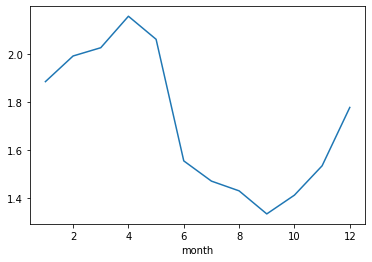

In [70]:
#data.groupby('month')['wind_degrees'].mean().plot()
data.groupby('month')['WSPM'].mean().plot()

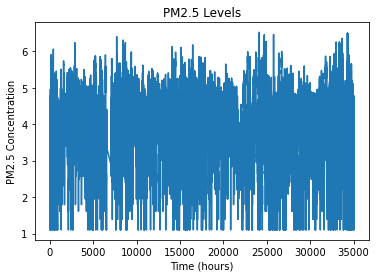

In [57]:
# 
PM25 = data['PM2.5']
plt.plot(PM25)
plt.title('PM2.5 Levels')
plt.xlabel('Time (hours)')
plt.ylabel('PM2.5 Concentration')
plt.show()

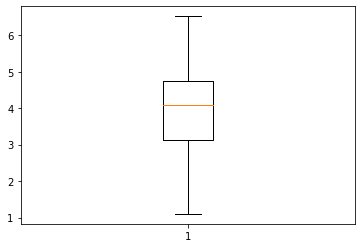

In [59]:
plt.boxplot(PM25)
plt.show()

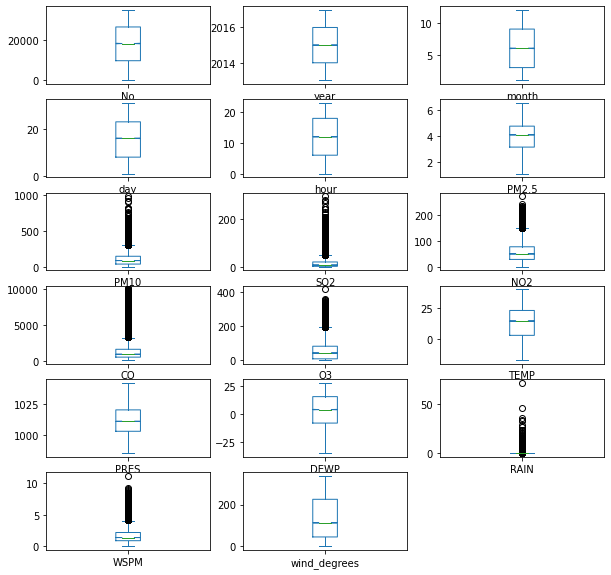

In [24]:
# Plot box plots for each column
data.plot(kind='box', subplots=True, layout=(6,3), figsize=(10,10), notch=True)
plt.show()

In [80]:
%%timeit -n 1 -r 1
# Multiple Linear Regression
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, explained_variance_score, mean_absolute_percentage_error

# Load the data
data = pd.read_csv('Guanyuan.csv')

# perform log transformation on 'variable_name' column
data['PM2.5'] = data['PM2.5'].apply(np.log)

# add a new column with the degree values
wind_dir_dict = {
    'N': 0,
    'NNE': 22.5,
    'NE': 45,
    'ENE': 67.5,
    'E': 90,
    'ESE': 112.5,
    'SE': 135,
    'SSE': 157.5,
    'S': 180,
    'SSW': 202.5,
    'SW': 225,
    'WSW': 247.5,
    'W': 270,
    'WNW': 292.5,
    'NW': 315,
    'NNW': 337.5
}
data['wind_degrees'] = data['wd'].map(wind_dir_dict)

# Data cleaning
data = data.dropna()

# Feature engineering
#X = data[['TEMP', 'DEWP', 'WSPM', 'RAIN', 'PRES', 'SO2', 'NO2', 'CO', 'O3', 'wind_degrees']]
#X = data[['TEMP', 'DEWP', 'WSPM', 'RAIN', 'PRES', 'SO2', 'NO2', 'CO', 'O3']]
#X = data[['DEWP', 'WSPM', 'RAIN', 'PRES', 'SO2', 'NO2', 'CO', 'O3']]
#X = data[['DEWP', 'RAIN', 'PRES', 'SO2', 'NO2', 'CO', 'O3']]
#X = data[['DEWP', 'PRES', 'SO2', 'NO2', 'CO', 'O3']]
#X = data[['DEWP', 'SO2', 'NO2', 'CO', 'O3']]
X = data[['DEWP', 'SO2', 'NO2', 'CO']]

# Convert wind direction to one-hot encoding
#wind_direction = pd.get_dummies(data['wd'], prefix='wind_direction')
#X = pd.concat([X, wind_direction], axis=1)

y = data['PM2.5']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Select a machine learning algorithm
model = LinearRegression()

# Traain the model
model.fit(X_train, y_train)

# Evaluation metrics
y_pred = model.predict(X_test)
score_r2 = r2_score(y_test, y_pred)
score_mae = mean_absolute_error(y_test, y_pred)
score_mse = mean_squared_error(y_test, y_pred)
score_rmse = mean_squared_error(y_test, y_pred, squared=False)
score_ev = explained_variance_score(y_test, y_pred)
score_mape = mean_absolute_percentage_error(y_test, y_pred)

print("Multiple Linear Regression")
print("Model R^2 Score:", score_r2)
print("Model Mean Absolute Error:", score_mae)
print("Model Mean Squared Error:", score_mse)
print("Model Root Mean Squared Error:", score_rmse)
print("Model Explained Variance Score:", score_ev)
print("Model Mean Absolute Percentage Error:", score_mape)



Multiple Linear Regression
Model R^2 Score: 0.6478578669614177
Model Mean Absolute Error: 0.4984397982514336
Model Mean Squared Error: 0.39728563047471266
Model Root Mean Squared Error: 0.6303059816269497
Model Explained Variance Score: 0.647967512924875
Model Mean Absolute Percentage Error: 0.15357786307684404
132 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
